# Basic Tutorial Notebook

## Package Imports

In [1]:
!python -m pip uninstall be_scan --yes
!python -m pip install git+https://github.com/liaulab/be-scan.git@feedback_fix

Found existing installation: be_scan 0.0.2
Uninstalling be_scan-0.0.2:
  Successfully uninstalled be_scan-0.0.2
  Cloning https://github.com/liaulab/be-scan.git (to revision feedback_fix) to /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-kro3kck3
  Running command git clone --filter=blob:none --quiet https://github.com/liaulab/be-scan.git /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-kro3kck3
  Running command git checkout -b feedback_fix --track origin/feedback_fix
  Switched to a new branch 'feedback_fix'
  branch 'feedback_fix' set up to track 'origin/feedback_fix'.
  Resolved https://github.com/liaulab/be-scan.git to commit fca793ec83d8e9842b76ecbc2d466f31ece74cd3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for be_scan: filename=be_scan-0.0.2-py3-none-any.whl size=92441 sha256=52fdebb7d69c5cfac03b3de704f11e1d4010a707be6125e99750

In [2]:
import warnings
warnings.filterwarnings('ignore')
import be_scan

Note: all annotate_guides.csv needs information about type of mutation (Missense, Silent, Nonsense, No_A/Exon, Control) and where the edit is along the gene (integer)

## be_scan.sgrna.design_library()

In [6]:
from be_scan.sgrna import design_library
sgrna_dir = "../../../tests/test_data/sgrna/"

guides = design_library(gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
                        genome_file      = f"{sgrna_dir}hg38_short.fa",
                        cas_type         = "SpG", 
                        edit_from        = "A", 
                        edit_to          = "G",
                        # optional inputs
                        protein_filepath = f"{sgrna_dir}P10275.fasta", 
                        gene_name        = "AR", 
                        exclude_introns  = False, exclude_nontargeting=False,
                        output_name      = 'ABE_filtered.csv'
                        )
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
Guides generated and duplicates removed
1600 guides were generated
Guides annotated
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
0 guides out of 1600 guides occurred more than once in the reference genome
Guides checked against reference genome
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,AtoG_win_overlap,A_count,AtoG_target_CDS,AtoG_codon_window,AtoG_residue_window,AtoG_edit_site,AtoG_mutations,AtoG_muttypes,AtoG_muttype,genome_occurrences
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,Intron,0,tcagc,attcagcca,___,-5.0,[],[],NaN,0
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,Intron,0,cagcc,cagccaagc,___,-5.0,[],[],NaN,0
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,Intron,0,ccaag,ccaagctca,___,-4.0,[],[],NaN,0
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,Intron,0,aagct,ccaagctca,___,-3.0,[],[],NaN,0
4,CTTCCATccttgagcttggc,tga,0,6,67545153,0,gccaagctcaaggATGGAAG,antisense,plus,AR,...,Intron,1,gATGG,aggATGGAA,_ME,0.0,['M1T'],['Missense'],Missense,0


## be_scan.analysis.batch_process()

Sample sheet is set up like this: 

| sample_id | fastq_file       | condition  | agg_conditions | counts_file  | noncounts_file  | stats_file  |
| --------- | ----------       | ---------  | -------------- | -----------  | --------------  | ----------  |
| 0         | control.fastq.gz | t0         | t0             | counts-1.csv | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | unsorted-1 | unsorted       | counts-2.csv | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | unsorted-2 | unsorted       | counts-3.csv | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | unsorted-3 | unsorted       | counts-4.csv | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | sorted-1   | sorted         | counts-5.csv | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | sorted-2   | sorted         | counts-6.csv | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | sorted-3   | sorted         | counts-7.csv | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

The names for treatment and control in the comparison sheet should correspond to the agg_conditions in the sample sheet

In [4]:
import be_scan
analysis_dir = "../../../tests/test_data/analysis/"

be_scan.analysis.batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    neg_ctrl_col  = 'gene', # optional
    neg_ctrl_conditions = ['control'], # optional

    file_dir     = analysis_dir, 
    KEY_INTERVAL = (0,35),
    KEY          = "ABCDEF",
    KEY_REV      = "GHIJKL",
    controls = ["counts1"],
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/counts_library.csv
Count reads completed
merge_and_norm outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/agg_log2_t0.csv
Merge and normalize completed
average_reps outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/avg_conds.csv
Average reps completed
compare_conds outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/conditions.csv
Compare conditions completed


## be_scan.plot.scatterplot()

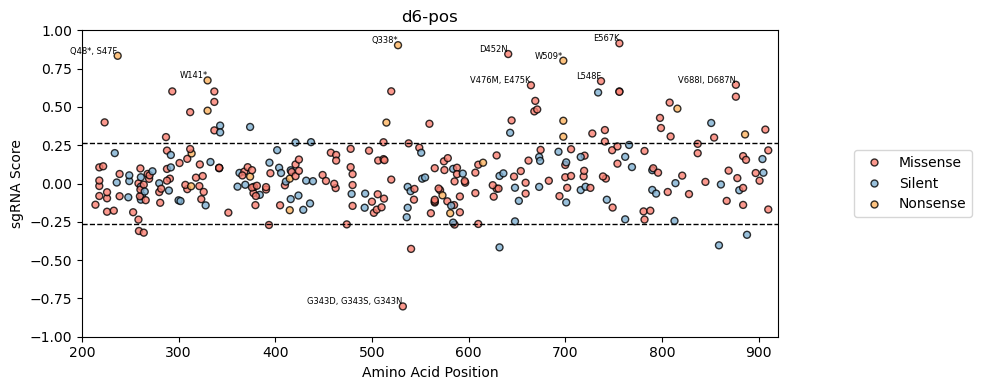

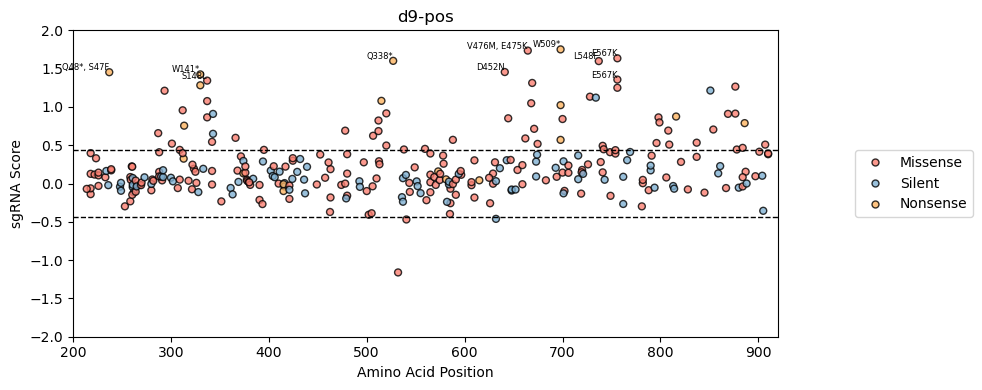

In [8]:
import be_scan
plot_file = '../../../tests/test_data/plot/NZL10196_v9_comparisons.csv'

be_scan.plot.scatterplot(df_filepath  = plot_file, # data
        x_column     = 'Edit_site_3A1',  # name of a column in data
        comparisons  = ['d6-pos', 'd9-pos'],       # names of a column in data, each is a graph

        include_hue=True, hue_col='Mut_type', # color settings
        neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control lines
        filter_params=True, params_cols=['Mut_type', 'Gene'], # filter for only these categories
        params_conditions=[['Nonsense', 'Missense', 'Silent'], ['DNMT3A']], 
        autoannot=True, autoannot_top=10, autoannot_label='Mut_list_all', # automatically label points
        xlim_kws={'xmin': 200, 'xmax': None}, savefig = False, # figure adjustments
        )